<a href="https://colab.research.google.com/github/Esteban-Prince/CPE-311/blob/main/HOA_9_2_SuppAct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Activity 9.2 Customized Visualizations using Seaborn


Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

3. Fill in the area between the bounds in the plot from exercise #2.

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:

 Disappointing user growth announced after close on July 25, 2018

 Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)

 FTC launches investigation on March 20, 2018

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.


In [13]:
# Using the CSV files provided and what we have learned so far in this module complete the following exercises:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, "Correlation Heatmap (magType='mb')")

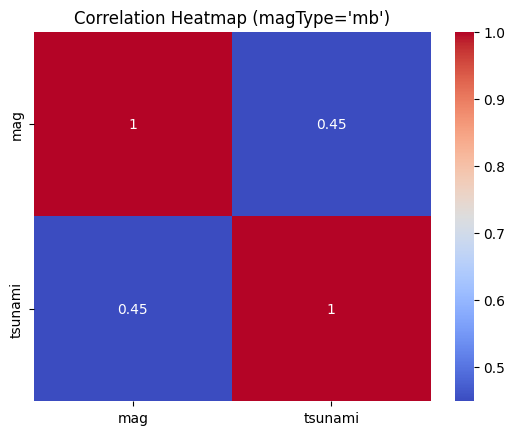

In [15]:
# 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

# Load  data
df = pd.read_csv("earthquakes.csv")

# Filter 'mb'
mb_df = df[df['magType'] == 'mb']

# Compute correlations
corr = mb_df[['mag', 'tsunami']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (magType='mb')")

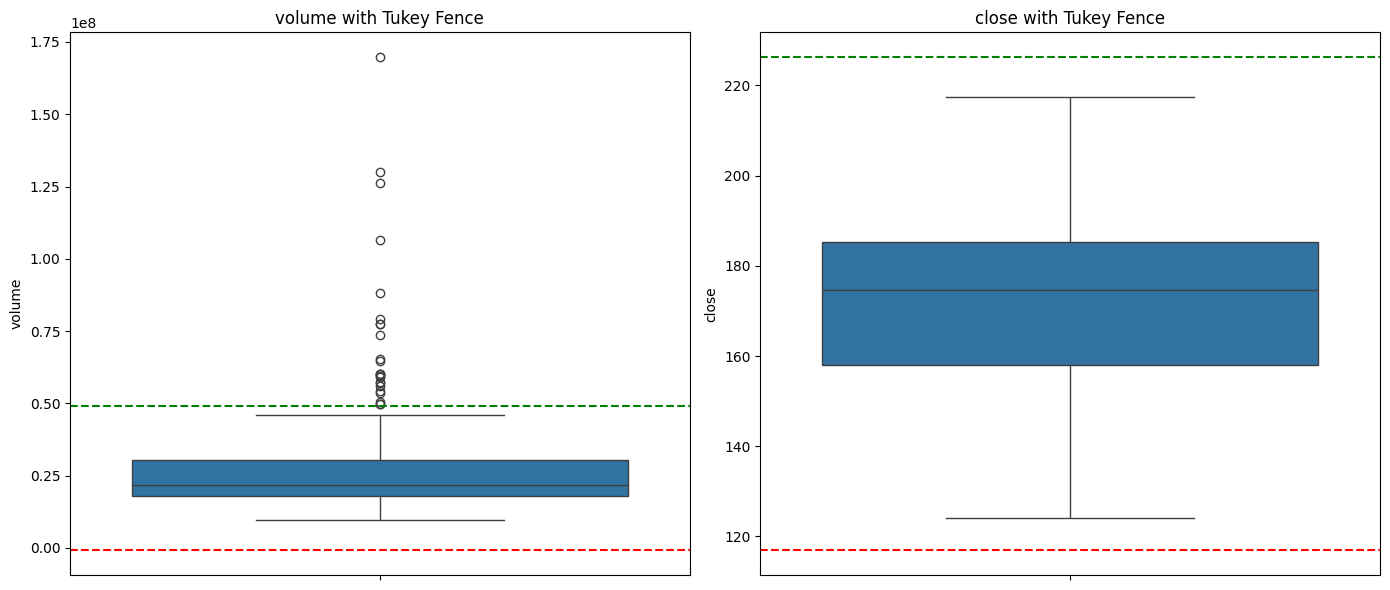

In [16]:
# 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

import numpy as np

fb = pd.read_csv("facebook.csv", index_col='date', parse_dates=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(['volume', 'close']):
    q1 = fb[col].quantile(0.25)
    q3 = fb[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    sns.boxplot(y=fb[col], ax=axes[i])
    axes[i].axhline(lower, color='red', linestyle='--')
    axes[i].axhline(upper, color='green', linestyle='--')
    axes[i].set_title(f'{col} with Tukey Fence')

plt.tight_layout()

Text(0.5, 1.0, 'Facebook Close Price with Filled Tukey Range')

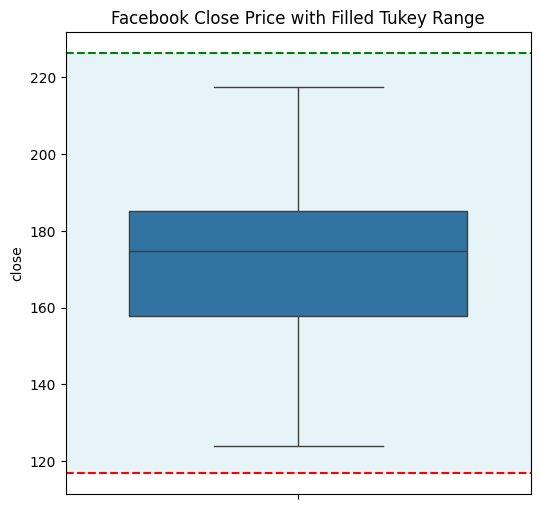

In [17]:
# 3. Fill in the area between the bounds in the plot from exercise #2.

fig, ax = plt.subplots(figsize=(6, 6))

col = 'close'
q1 = fb[col].quantile(0.25)
q3 = fb[col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

sns.boxplot(y=fb[col], ax=ax)
ax.axhline(lower, color='red', linestyle='--')
ax.axhline(upper, color='green', linestyle='--')
ax.fill_betweenx(y=[lower, upper], x1=0, x2=1, color='lightblue', alpha=0.3, transform=ax.get_yaxis_transform())

ax.set_title('Facebook Close Price with Filled Tukey Range')

Text(0.5, 1.0, 'Facebook Closing Price with Decline Period Highlighted')

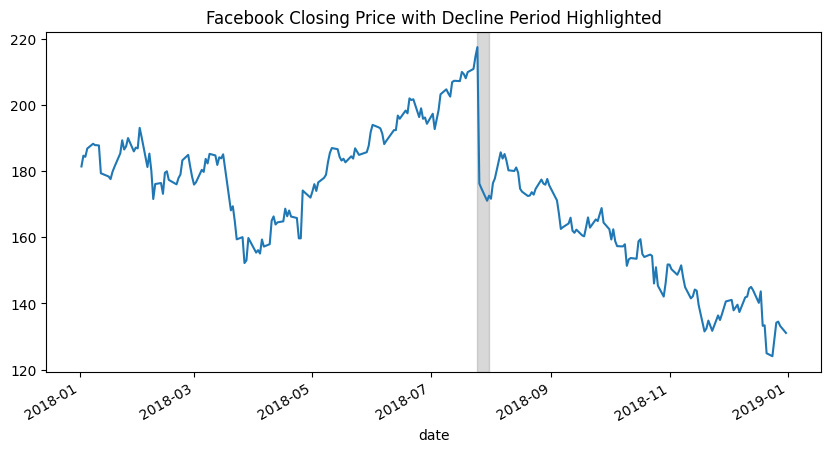

In [18]:
# 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

fig, ax = plt.subplots(figsize=(10, 5))

fb['close'].plot(ax=ax)
ax.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color='gray', alpha=0.3)
ax.set_title("Facebook Closing Price with Decline Period Highlighted")

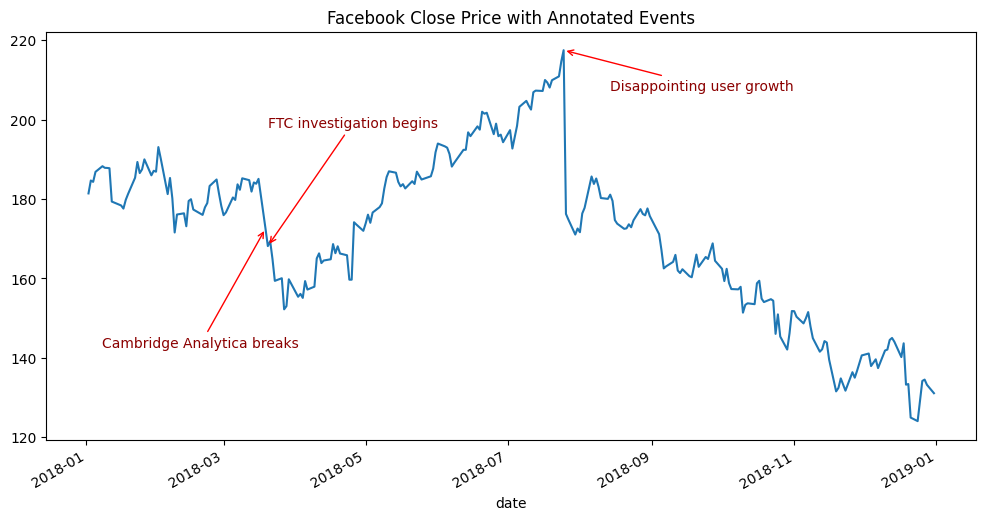

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))

fb['close'].plot(ax=ax)
events = {
      # Disappointing user growth announced after close on July 25, 2018
    '2018-07-25': 'Disappointing user growth',
      # Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
    '2018-03-19': 'Cambridge Analytica breaks',
      # FTC launches investigation on March 20, 2018
    '2018-03-20': 'FTC investigation begins'
}

# Define (x, y) offset for each annotation to get diagonal arrows
offsets = [
    (20, -10),  # Left-up
    (-70, -30),   # Right-up
    (0, 30)  # Left-down
]

for (date, label), (dx, dy) in zip(events.items(), offsets):
    x = pd.to_datetime(date)
    y = fb.loc[date, 'close']

    ax.annotate(label,
                xy=(x, y),
                xytext=(x + pd.Timedelta(days=dx), y + dy),
                arrowprops=dict(arrowstyle="->", color='red'),
                fontsize=10,
                color='darkred')

ax.set_title("Facebook Close Price with Annotated Events")
plt.show()


<ipython-input-28-13d5459b1af7>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique_groups))  # Use qualitative colormap


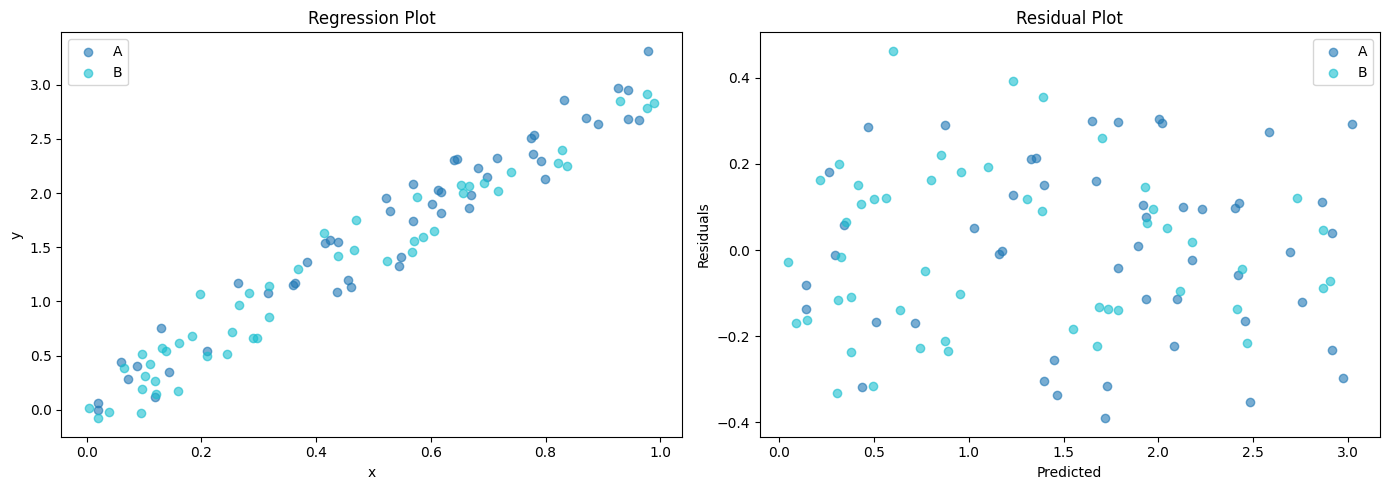

In [28]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

from matplotlib.colors import to_rgba
import matplotlib.cm as cm

def reg_resid_plots(x, y, group=None):
    import statsmodels.api as sm

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    if group is None:
        group = ['All'] * len(x)

    unique_groups = list(pd.Series(group).unique())
    cmap = cm.get_cmap('tab10', len(unique_groups))  # Use qualitative colormap

    for i, grp in enumerate(unique_groups):
        mask = (pd.Series(group) == grp)
        x_vals = x[mask]
        y_vals = y[mask]

        axs[0].scatter(x_vals, y_vals, color=cmap(i), label=str(grp), alpha=0.6)

        X_sm = sm.add_constant(x_vals)
        model = sm.OLS(y_vals, X_sm).fit()
        pred_vals = model.predict(X_sm)

        axs[1].scatter(pred_vals, model.resid, color=cmap(i), label=str(grp), alpha=0.6)

    axs[0].set_title('Regression Plot')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[1].set_title('Residual Plot')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Residuals')
    for ax in axs:
        ax.legend()

    plt.tight_layout()

# Random test data
np.random.seed(0)
x = pd.Series(np.random.rand(100))
y = 3 * x + np.random.normal(0, 0.2, size=100)
group = ['A' if i < 50 else 'B' for i in range(100)]

reg_resid_plots(x, y, group)
